# **[Link to Kaggle™ Dataset](https://www.kaggle.com/datasets/puneet6060/intel-image-classification/)**

**Mounting Google Drive to access local dataset files.**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# /content/drive/MyDrive/insert path

Mounted at /content/drive


**Importing all the necessary libraries and modules**

---



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.utils import to_categorical, image_dataset_from_directory
import matplotlib.pyplot as plt
from keras.applications import Xception, EfficientNetB2
import os
import numpy as np
from PIL import Image
from keras.preprocessing.image  import ImageDataGenerator    # Keras libaray to manage image files

**Defining functions that will allow us to load the individual images from the dataset into NumPy arrays useful for feeding a model...**

---



In [ ]:
# Alternative and effective code for loading image data

In [ ]:
base_dir = '/content/drive/Othercomputers/My Surface Laptop/1hundred percent Coding/Personal Programming/ML/Scenes of Nature Dataset/'
train_dir = os.path.join(base_dir, 'seg_train/seg_train')
validation_dir = os.path.join(base_dir,'seg_test/seg_test')
test_dir = os.path.join(base_dir, 'seg_pred')

In [ ]:
train_buildings_dir = os.path.join(train_dir, 'buildings')
val_buildings_dir = os.path.join(validation_dir, 'buildings')
test_buildings_dir = os.path.join(test_dir, 'buildings')

train_forest_dir = os.path.join(train_dir, 'forest')
val_forest_dir = os.path.join(validation_dir, 'forest')
test_forest_dir = os.path.join(test_dir, 'forest')

train_glacier_dir = os.path.join(train_dir, 'glacier')
val_glacier_dir = os.path.join(validation_dir, 'glacier')
test_glacier_dir = os.path.join(test_dir, 'glacier')

train_mountain_dir = os.path.join(train_dir, 'mountain')
val_mountain_dir = os.path.join(validation_dir, 'mountain')
test_mountain_dir = os.path.join(test_dir, 'mountain')

train_sea_dir = os.path.join(train_dir, 'sea')
val_sea_dir = os.path.join(validation_dir, 'sea')
test_sea_dir = os.path.join(test_dir, 'sea')

train_street_dir = os.path.join(train_dir, 'street')
val_street_dir = os.path.join(validation_dir, 'street')
test_street_dir = os.path.join(test_dir, 'street')

In [ ]:
# train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
   train_dir,                                           # target directory
   target_size=(150, 150),                  # resize all images to 150 x 150
   batch_size=100,                                # batch size
   class_mode='categorical'
)

Found 14034 images belonging to 6 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(    # repeat the same with the validation 							       #samples
  validation_dir,
  target_size=(150, 150),
	batch_size=20,
  class_mode='categorical'
)

Found 3000 images belonging to 6 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(    # repeat the same with the validation 							       #samples
  test_dir,
  target_size=(150, 150),
	batch_size=20,
  class_mode='categorical'
)

Found 21335 images belonging to 7 classes.


**Calling the Data Loader functions defined earlier**

---



**Creating the Organic model and adding the necessary layers**

---



In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(8, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 16)        0

**Compiling the model with the apporopriate loss function and an optimizer then fitting it to the Scenes from Nature dataset**

---



In [ ]:
loss=tf.keras.losses.CategoricalCrossentropy()
model.compile(loss=loss, optimizer='adam', metrics=['accuracy']) # use , 'f1_score' later

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=140,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=150
    )

Epoch 1/10
140/140 [==============================] - 3058s 22s/step - loss: 1.3108 - accuracy: 0.4786 - val_loss: 1.3316 - val_accuracy: 0.4763
Epoch 2/10
140/140 [==============================] - 1272s 9s/step - loss: 1.0695 - accuracy: 0.5866 - val_loss: 1.0256 - val_accuracy: 0.5980
Epoch 3/10
140/140 [==============================] - 1032s 7s/step - loss: 0.9671 - accuracy: 0.6218 - val_loss: 0.9592 - val_accuracy: 0.6343
Epoch 4/10
140/140 [==============================] - 847s 6s/step - loss: 0.9070 - accuracy: 0.6479 - val_loss: 0.9468 - val_accuracy: 0.6330
Epoch 5/10
140/140 [==============================] - 656s 5s/step - loss: 0.8454 - accuracy: 0.6754 - val_loss: 0.8369 - val_accuracy: 0.6823
Epoch 6/10
140/140 [==============================] - 565s 4s/step - loss: 0.8288 - accuracy: 0.6832 - val_loss: 0.8419 - val_accuracy: 0.6730
Epoch 7/10
140/140 [==============================] - 446s 3s/step - loss: 0.7969 - accuracy: 0.7050 - val_loss: 0.7688 - val_accuracy: 0.

**Plotting Graphs that show how the accuracy and loss (normal and validation) change with each epoch**

---



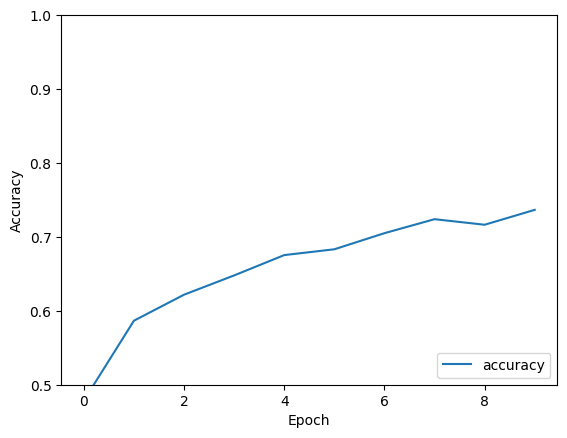

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

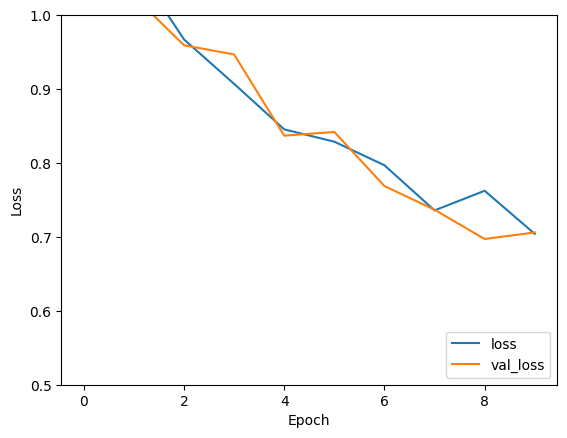

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

**Evaluating the model with the test data**

---



In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

print(test_loss)
print('\n')
print(test_acc)

NameError: ignored

# **Fine-tuning an Xception model with the Scenes of Nature dataset**

---



In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
tl_model = Xception(weights='imagenet')

91884032/91884032 [==============================] - 3s 0us/step


In [ ]:
img_path = os.path.join(test_dir, 'mountain\153.jpg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds = tl_model.predict(x)

In [ ]:
conv_base = Xception(weights='imagenet',	include_top=False, input_shape=(150, 150, 3))

83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 33970478 (129.59 MB)
Trainable params: 33915950 (129.38 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
from keras import optimizers

In [ ]:
model.compile(loss='binary_crossentropy',  optimizer=optimizers.RMSprop(learning_rate=2e-5),  metrics=['acc'])

history = model.fit(train_generator, steps_per_epoch=140, epochs=30, validation_data=validation_generator,  validation_steps=50)

Epoch 1/30
140/140 [==============================] - 3499s 25s/step - loss: 0.1805 - acc: 0.8034 - val_loss: 0.1158 - val_acc: 0.8880
Epoch 2/30
140/140 [==============================] - 262s 2s/step - loss: 0.1312 - acc: 0.8565 - val_loss: 0.1160 - val_acc: 0.8770
Epoch 3/30
140/140 [==============================] - 254s 2s/step - loss: 0.1217 - acc: 0.8632 - val_loss: 0.1072 - val_acc: 0.8940
Epoch 4/30
140/140 [==============================] - 185s 1s/step - loss: 0.1162 - acc: 0.8690 - val_loss: 0.1060 - val_acc: 0.8810
Epoch 5/30
140/140 [==============================] - 159s 1s/step - loss: 0.1110 - acc: 0.8780 - val_loss: 0.0979 - val_acc: 0.8970
Epoch 6/30
140/140 [==============================] - 148s 1s/step - loss: 0.1086 - acc: 0.8782 - val_loss: 0.1021 - val_acc: 0.8930
Epoch 7/30
140/140 [==============================] - 132s 940ms/step - loss: 0.1060 - acc: 0.8812 - val_loss: 0.0972 - val_acc: 0.8950
Epoch 8/30
140/140 [==============================] - 135s 962ms

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
conv_base.trainable = True	# unfreeze the whole conv_base

set_trainable = False
for layer in conv_base.layers:
  if 'block14_sepconv' in layer.name:
    set_trainable = True
  if set_trainable:
    layer.trainable = True	# must be a conv_5 layer	so make trainable
  else:
    layer.trainable = False	# a different layer	so freeze it

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy',  optimizer=optimizers.RMSprop(learning_rate=0.01),  metrics=['acc'])

history = model.fit(train_generator, steps_per_epoch=140, epochs=10, validation_data=validation_generator,  validation_steps=50)

Epoch 1/10
140/140 [==============================] - 7110s 51s/step - loss: 0.9149 - acc: 0.8022 - val_loss: 0.2306 - val_acc: 0.8440
Epoch 2/10
140/140 [==============================] - 461s 3s/step - loss: 0.1146 - acc: 0.8728 - val_loss: 0.1476 - val_acc: 0.8690
Epoch 3/10
140/140 [==============================] - 383s 3s/step - loss: 0.1022 - acc: 0.8834 - val_loss: 0.0945 - val_acc: 0.8900
Epoch 4/10
140/140 [==============================] - 259s 2s/step - loss: 0.0978 - acc: 0.8926 - val_loss: 0.0796 - val_acc: 0.9180
Epoch 5/10
140/140 [==============================] - 260s 2s/step - loss: 0.0949 - acc: 0.8937 - val_loss: 0.0869 - val_acc: 0.9030
Epoch 6/10
140/140 [==============================] - 179s 1s/step - loss: 0.0881 - acc: 0.9002 - val_loss: 0.0953 - val_acc: 0.9050
Epoch 7/10
140/140 [==============================] - 204s 1s/step - loss: 0.0863 - acc: 0.9013 - val_loss: 0.1104 - val_acc: 0.8970
Epoch 8/10
140/140 [==============================] - 150s 1s/step 

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

KeyError: ignored

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
def extract_features(generator, sample_count):
  batch_size = generator.batch_size
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  # i = 0
  for i, inputs_batch, labels_batch in enumerate(generator):
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

In [ ]:
features_training, labels_training = extract_features(train_generator, 14034)
features_validating, labels_validating = extract_features(validation_generator, 3000)
features_testing, labels_testing = extract_features(test_generator, 21335)

In [ ]:
features_training = np.reshape(features_training, (14034, 5 * 5 * 2048))
features_validating = np.reshape(features_validating, (3000, 5 * 5 * 2048))
features_testing = np.reshape(features_testing, (21335, 5 * 5 * 2048))

In [ ]:
np.save('tl_feature_extraction_data_ftrain', features_training)
np.save('tl_feature_extraction_data', features_validating)
np.save('tl_feature_extraction_data', features_testing)
np.save('tl_feature_extraction_data', labels_training)
np.save('tl_feature_extraction_data', labels_validating)
np.save('tl_feature_extraction_data', labels_testing)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(gamma='auto')